In [3]:
%pip install yahooquery
%pip install sklearn

  Using cached yahooquery-2.3.7-py3-none-any.whl (52 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Using cached sklearn-0.0.tar.gz (1.1 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\gianm\\AppData\\Local\\Temp\\pip-install-z5k80lg0\\sklearn_94b3516c9ba34e5bb00ba4745d1fa1c3\\setup.py'"'"'; __file__='"'"'C:\\Users\\gianm\\AppData\\Local\\Temp\\pip-install-z5k80lg0\\sklearn_94b3516c9ba34e5bb00ba4745d1fa1c3\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\gianm\AppData\Local\Temp\pip-pip-egg-info-n4_6umsf'
         cwd: C:\Users\gianm\AppData\Local\Temp\pip-install-z5k80lg0\sklearn_94b3516c9ba34e5bb00ba4745d1fa1c3\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  

In [22]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd



snp_tickers = ['ABT', 'MSFT', 'XOM', 'AMZN', 'DAL', 'AVB', 'KO', 'CAT', 'BAC', 'DUK']


df = yf.download(snp_tickers, start='2019-01-01', end='2021-12-31')['Adj Close']
df.dropna(inplace=True)
df.head()

[*********************100%***********************]  10 of 10 completed


Ticker,ABT,AMZN,AVB,BAC,CAT,DAL,DUK,KO,MSFT,XOM
Date,,,,,,,,,,
2019-01-02 00:00:00+00:00,62.657776,76.956497,139.100266,21.551336,110.120682,47.681259,66.872276,38.957539,95.501335,52.611275
2019-01-03 00:00:00+00:00,59.700691,75.014000,139.757935,21.205965,105.877235,43.416695,66.848595,38.716808,91.988007,51.803490
2019-01-04 00:00:00+00:00,61.404633,78.769501,140.744476,22.086662,111.662979,45.491867,67.401260,39.488808,96.266296,53.713482
2019-01-07 00:00:00+00:00,62.324188,81.475502,140.349854,22.069403,111.732666,45.548977,67.117043,38.974133,96.389084,53.992809
2019-01-08 00:00:00+00:00,61.575916,82.829002,143.260147,22.026226,113.074554,45.187248,67.961815,39.414116,97.087975,54.385372


Healthcare: ABT (Abbott Laboratories) | Technology: MSFT (Microsoft Corporation) | Energy: XOM (Exxon Mobil Corporation) | Consumer Discretionary: AMZN (Amazon) | Travel & Hospitality: DAL (Delta Air Lines) | Real Estate: AVB (AvalonBay Communities) | Consumer Staples: KO (Coca-Cola) | Industrials: CAT (Caterpillar Inc.) | Finance: BAC (Bank of America) | Utilities: DUK (Duke Energy)

[*********************100%***********************]  1 of 1 completed


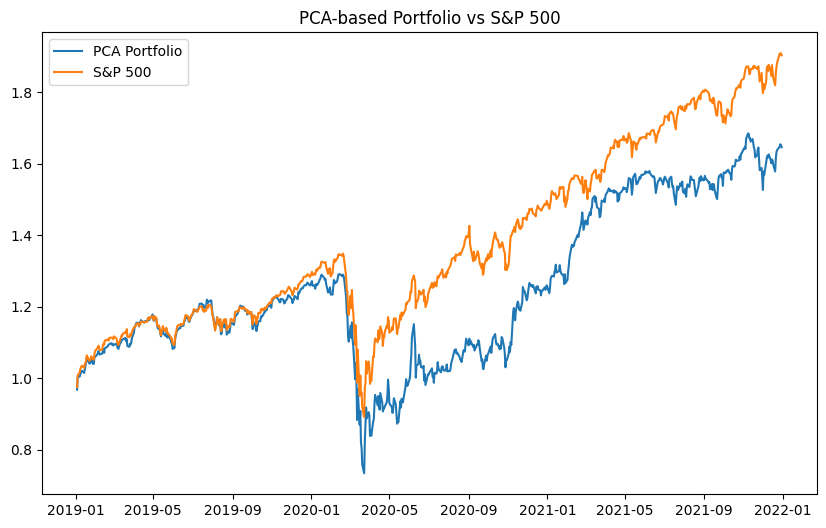

In [ ]:
returns = df.pct_change().dropna()

rs = df.apply(np.log).diff(1)
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])
principal_component = pca.components_[0]
weights = principal_component / np.sum(np.abs(principal_component))
portfolio_returns = returns.dot(weights)

sp500 = yf.download('^GSPC', start='2019-01-01', end='2021-12-31')['Adj Close']
sp500_returns = sp500.pct_change().dropna()

# Plot the cumulative returns of the PCA-based portfolio and the S&P 500
plt.figure(figsize=(10, 6))
plt.plot((1 + portfolio_returns).cumprod(), label='PCA Portfolio')
plt.plot((1 + sp500_returns).cumprod(), label='S&P 500')
plt.legend()
plt.title('PCA-based Portfolio vs S&P 500')
plt.show()